In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data_path = './FiveCitiePMData/BeijingPM20100101_20151231.csv'
df = pd.read_csv(data_path)

df.describe()


,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,25052.000000,20508.000000,24931.000000,50387.000000,52579.000000,52245.000000,52245.000000,52579.000000,52579.000000,52100.000000,52100.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,87.239267,88.027434,88.041166,91.643772,14.222059,25.991338,10.295070,12.098527,49.281706,4381.035532,4381.036040
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,28.000000,24.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,64.000000,68.000000,62.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,124.000000,127.000000,122.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,21.020000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP             52579 non-null  float64
 11  HUMI             52245 non-null  float64
 12  PRES             52245 non-null  float64
 13  TEMP             52579 non-null  float64
 14  cbwd             52579 non-null  object 
 15  Iws              52579 non-null  float64
 16  precipitation    52100 non-null  float64
 17  Iprec       

In [5]:
selected_variables = ["year","month","day","hour","season","PM_Dongsi","HUMI","TEMP","PRES","Iws","precipitation"]
df.loc[df["PM_Dongsi"].notna(),["year","month","day","hour","season","PM_Dongsi","HUMI","TEMP","PRES","Iws","precipitation"]]

,year,month,day,hour,season,PM_Dongsi,HUMI,TEMP,PRES,Iws,precipitation
26694,2013,1,17,6,4,25.0,56.0,-10.0,1038.0,4.92,0.0
26695,2013,1,17,7,4,22.0,52.0,-8.0,1039.0,4.92,0.0
26696,2013,1,17,8,4,20.0,45.0,-6.0,1040.0,8.94,0.0
26697,2013,1,17,9,4,24.0,38.0,-4.0,1040.0,12.07,0.0
26698,2013,1,17,10,4,27.0,35.0,-3.0,1040.0,16.09,0.0
...,...,...,...,...,...,...,...,...,...,...,...
52578,2015,12,31,18,4,119.0,58.0,-3.0,1030.0,6.25,0.0
52579,2015,12,31,19,4,140.0,68.0,-3.0,1031.0,7.14,0.0
52580,2015,12,31,20,4,157.0,63.0,-2.0,1030.0,8.03,0.0
52581,2015,12,31,21,4,171.0,73.0,-6.0,1030.0,0.89,0.0


In [3]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts(), '\n')

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

count     52100.000000
mean         19.258683
std        4381.035532
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999990.000000
Name: precipitation, dtype: float64
mode:  0    0.0
dtype: float64
0.0     50086
0.1       441
0.2       230
0.3       164
0.4       115
        ...  
10.6        1
26.5        1
8.6         1
7.4         1
8.7         1
Name: precipitation, Length: 143, dtype: int64 



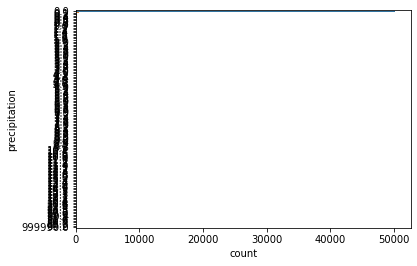

In [53]:

c_palette = ['tab:blue', 'tab:orange']
# categorical_summarized(df, y = 'season', palette=c_palette)
# categorical_summarized(df, y = 'month', palette=c_palette)

# categorical_summarized(df, y = 'precipitation', palette=c_palette)

count    1000.00000
mean       95.50500
std        88.45546
min         3.00000
25%        20.00000
50%        76.00000
75%       134.00000
max       520.00000
Name: PM_Dongsi, dtype: float64
mode:  0    3.0
dtype: float64


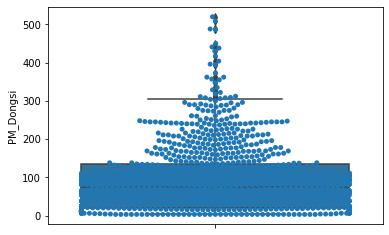

In [15]:
c_palette = ['tab:blue', 'tab:orange']

# Data columns (total 18 columns):
#  #   Column           Non-Null Count  Dtype  
# ---  ------           --------------  -----  
#  0   No               52584 non-null  int64  
#  1   year             52584 non-null  int64  
#  2   month            52584 non-null  int64  
#  3   day              52584 non-null  int64  
#  4   hour             52584 non-null  int64  
#  5   season           52584 non-null  int64  
#  6   PM_Dongsi        25052 non-null  float64
#  7   PM_Dongsihuan    20508 non-null  float64
#  8   PM_Nongzhanguan  24931 non-null  float64
#  9   PM_US Post       50387 non-null  float64
#  10  DEWP             52579 non-null  float64
#  11  HUMI             52245 non-null  float64
#  12  PRES             52245 non-null  float64
#  13  TEMP             52579 non-null  float64
#  14  cbwd             52579 non-null  object 
#  15  Iws              52579 non-null  float64
#  16  precipit

selected_variables = ["year","month","day","hour","season","PM_Dongsi","HUMI","TEMP","PRES","Iws","precipitation"] 
# analysis_df = df.loc[df.PM_Dongsi.notna()][["PM_Dongsi","PM_Dongsihuan","PM_Nongzhanguan","year","month","day","hour","season","HUMI","PRES","TEMP"]][:1000]
analysis_df = df.loc[df.PM_Dongsi.notna()][selected_variables][1000:2000]


# quantitative_summarized(dataframe= analysis_df, y = 'PM_Dongsi', palette=c_palette, verbose=False, swarm=True)


In [8]:
#  df[['PM_Dongsi']].head()
plt.figure(figsize=(14,12))
# print(df[['PM_Dongsi']].max())

df["datetime"] = pd.to_datetime(dict(year=df.year, month=df.month, day=df.day, hour=df.hour))
# sns.lineplot(data=df[['PM_Dongsi', 'datetime']], x='datetime', y='PM_Dongsi')
# plt.show()

<Figure size 1008x864 with 0 Axes>

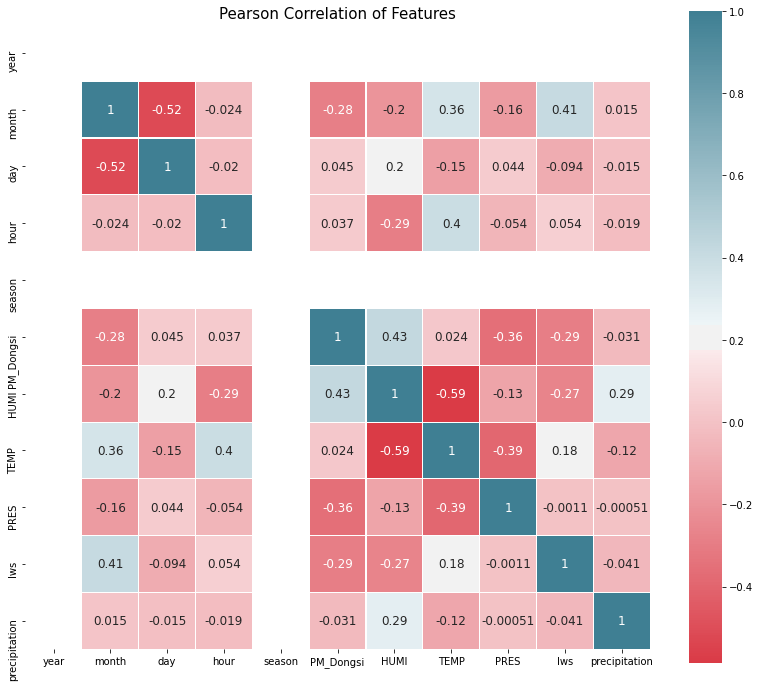

In [16]:
# df_month = df["month", "season"]
# df.loc[["month", "season"], :].head()
# corr_df = df.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
# corr_df['Age'] = analysis_df['Age'].fillna(value=corr_df['Age'].mode()[0])

# df.loc[df.PM_Dongsi.notna()][:1000]
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(analysis_df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })

# sns.pairplot(data=analysis_df)
plt.show()

## Testing models

- SVM (SVR)
- RF (Random Forest)

In [9]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import datetime as dt

selected_variables = ["year","month","day","hour","season","PM_Dongsi","HUMI","TEMP","PRES","Iws","precipitation","datetime"] 
# analysis_df = df.loc[df.PM_Dongsi.notna()][["PM_Dongsi","PM_Dongsihuan","PM_Nongzhanguan","year","month","day","hour","season","HUMI","PRES","TEMP"]][:1000]

train_df = df.loc[df.PM_Dongsi.notna()][selected_variables]
train_df = train_df.loc[train_df.precipitation.notna()]
train_df = train_df.loc[train_df.HUMI.notna()]
train_df = train_df.loc[train_df.TEMP.notna()]
train_df = train_df.loc[train_df.PRES.notna()]

train_df.describe()
# print("precipitation", train_df["precipitation"].hasnans)
# print("HUMI", train_df["HUMI"].hasnans)
# print("TEMP", train_df["TEMP"].hasnans)
# print("PRES", train_df["PRES"].hasnans)

# train_df["precipitation"].hasnans

# y = train_df["PM_Dongsi"]
# X = train_df[["season","HUMI","TEMP","PRES","Iws","precipitation"]]

# X['datetime'] = X['datetime'].map(X['datetime'].toordinal)
# X['datetime'] = X['datetime'].map(dt.datetime.toordinal)


,year,month,day,hour,season,PM_Dongsi,HUMI,TEMP,PRES,Iws,precipitation
count,24237.000000,24237.000000,24237.00000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000
mean,2013.996452,6.532327,15.74147,11.503734,2.465198,88.761027,53.295375,13.435656,1016.193155,20.483312,0.049602
std,0.804799,3.402388,8.82440,6.920483,1.116758,87.378294,25.870913,11.608482,10.130609,46.015082,0.588489
min,2013.000000,1.000000,1.00000,0.000000,1.000000,3.000000,2.000000,-15.000000,991.000000,0.450000,0.000000
25%,2013.000000,4.000000,8.00000,6.000000,1.000000,24.000000,31.000000,3.000000,1008.000000,1.790000,0.000000
50%,2014.000000,7.000000,16.00000,12.000000,2.000000,64.000000,54.000000,15.000000,1016.000000,4.920000,0.000000
75%,2015.000000,9.000000,23.00000,18.000000,3.000000,124.000000,76.000000,23.000000,1024.000000,18.340000,0.000000
max,2015.000000,12.000000,31.00000,23.000000,4.000000,737.000000,100.000000,40.000000,1043.000000,490.380000,30.400000


In [131]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# import numpy as np
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

y = train_df["PM_Dongsi"]
X = train_df[["season","HUMI","TEMP","PRES","Iws","precipitation"]]

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svr', SVR(epsilon=0.2))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
# regr.predict([X], y)

regr.predict()


In [5]:
# My version of the code at this blog post:
# https://towardsdatascience.com/automl-a-tool-to-improve-your-workflow-1a132248371f

import h2o
from h2o.automl import H2OAutoML

h2o.init()

train = h2o.import_file(data_path)
y = 'PM_Dongsi' #"C1" #e = edible, p = poisonous

# Train AutoML for 10 mins
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(y=y, training_frame=train)

# Look at Leaderboard (will have more or fewer models, depending on the hardware used)
aml.leaderboard

# model_id                                               auc      logloss    mean_per_class_error         rmse          mse
# ---------------------------------------------------  -----  -----------  ----------------------  -----------  -----------
# StackedEnsemble_BestOfFamily_AutoML_20190612_161331      1  0.00136702                        0  0.00144618   2.09143e-06
# XGBoost_grid_1_AutoML_20190612_161331_model_4            1  0.000613344                       0  0.00231538   5.361e-06
# GBM_5_AutoML_20190612_161331                             1  1.46072e-13                       0  1.62172e-12  2.62997e-24
# GBM_3_AutoML_20190612_161331                             1  1.07278e-16                       0  6.88271e-15  4.73717e-29
# GBM_grid_1_AutoML_20190612_161331_model_1                1  0.000462979                       0  0.000671548  4.50977e-07
# StackedEnsemble_AllModels_AutoML_20190612_161331         1  0.000839458                       0  0.000880344  7.75006e-07
# GBM_2_AutoML_20190612_161331                             1  2.06903e-17                       0  1.05991e-15  1.1234e-30
# XGBoost_grid_1_AutoML_20190612_161331_model_1            1  0.000164531                       0  0.000872258  7.60834e-07
# XGBoost_1_AutoML_20190612_161331                         1  0.00210774                        0  0.0085784    7.3589e-05
# DeepLearning_grid_1_AutoML_20190612_161331_model_2       1  0.000968467                       0  0.0167997    0.00028223
# 
# [26 rows x 6 columns]



# Or if you want to evaluate performance on a test set instead of using leaderboard metrics,
# you can create a test set and do the following:

# df = h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
# y = "C1" #e = edible, p = poisonous
# train, test = df.split_frame(ratios=[.8])
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(y=y, training_frame=train)
# perf = aml.leader.model_performance(test)
# print(perf)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/anargu/.pyenv/versions/3.8.0/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkhghmu28
  JVM stdout: /tmp/tmpkhghmu28/h2o_anargu_started_from_python.out
  JVM stderr: /tmp/tmpkhghmu28/h2o_anargu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_anargu_qbxhbx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.908 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
20:57:30.871: XGBoost_1_AutoML_20210621_205729 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_20210621_205729_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


█
20:57:31.874: XGBoost_2_AutoML_20210621_205729 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_20210621_205729_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.



20:57:32.880: XGBoost_3_AutoML_20210621_205729 [XGBoost def_3] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_3_AutoML_20210621_205729_cv_1.  Details: ERRR on field: _response_column: Response 

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210621_205729,261.809,16.1805,261.809,9.06855,nan
StackedEnsemble_BestOfFamily_AutoML_20210621_205729,261.869,16.1824,261.869,9.12154,nan
GBM_grid__1_AutoML_20210621_205729_model_2,268.412,16.3833,268.412,9.47859,nan
GBM_4_AutoML_20210621_205729,284.323,16.8619,284.323,9.36936,nan
GBM_3_AutoML_20210621_205729,286.096,16.9144,286.096,9.48308,nan
GBM_1_AutoML_20210621_205729,288.101,16.9735,288.101,9.6941,nan
GBM_2_AutoML_20210621_205729,292.159,17.0927,292.159,9.72491,nan
XRT_1_AutoML_20210621_205729,299.025,17.2923,299.025,9.75676,0.284344
DRF_1_AutoML_20210621_205729,313.11,17.6949,313.11,9.95203,0.287956
GBM_grid__1_AutoML_20210621_205729_model_3,339.827,18.4344,339.827,10.1437,nan
